In [10]:
import arviz as az
import os.path as op
import seaborn as sns
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
az.rcParams["data.load"] = 'eager'

In [12]:
bids_folder = '/data/ds-risk'

In [13]:
df = []
keys = []
rois = ['lc', 'vtav2', 'sncv2', 'meynert']
# rois = ['vtav2', 'sncv2', 'lc']
pars =['n1_evidence_sd_mu', 'n2_evidence_sd_mu', 'risky_prior_mu_mu', 'risky_prior_std_mu', 'safe_prior_mu_mu', 'safe_prior_std_mu'] 

for mask, parameter in product(rois, pars):
    idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/ses-7t2_model-subcortical_response1_{mask}_trace.netcdf')
    df.append(idata.posterior[parameter].to_dataframe().xs(mask, 0, -1)[parameter])
    keys.append((mask.replace('v2', ''), parameter))

df = pd.concat(df, keys=keys, names=['mask', 'parameter']).to_frame('value')


n1_evidence_sd_mu lc 0.13916666666666666
n1_evidence_sd_mu meynert 0.4035
n1_evidence_sd_mu snc 0.14366666666666672
n1_evidence_sd_mu vta 0.1781666666666667
n2_evidence_sd_mu lc 0.3993333333333333
n2_evidence_sd_mu meynert 0.13016666666666665
n2_evidence_sd_mu snc 0.1323333333333333
n2_evidence_sd_mu vta 0.0595
risky_prior_mu_mu lc 0.37033333333333335
risky_prior_mu_mu meynert 0.4295
risky_prior_mu_mu snc 0.23516666666666666
risky_prior_mu_mu vta 0.2425
risky_prior_std_mu lc 0.3793333333333333
risky_prior_std_mu meynert 0.2856666666666666
risky_prior_std_mu snc 0.132
risky_prior_std_mu vta 0.10816666666666663
safe_prior_mu_mu lc 0.381
safe_prior_mu_mu meynert 0.37733333333333335
safe_prior_mu_mu snc 0.15866666666666668
safe_prior_mu_mu vta 0.19416666666666665
safe_prior_std_mu lc 0.04416666666666669
safe_prior_std_mu meynert 0.3398333333333333
safe_prior_std_mu snc 0.08833333333333337
safe_prior_std_mu vta 0.129


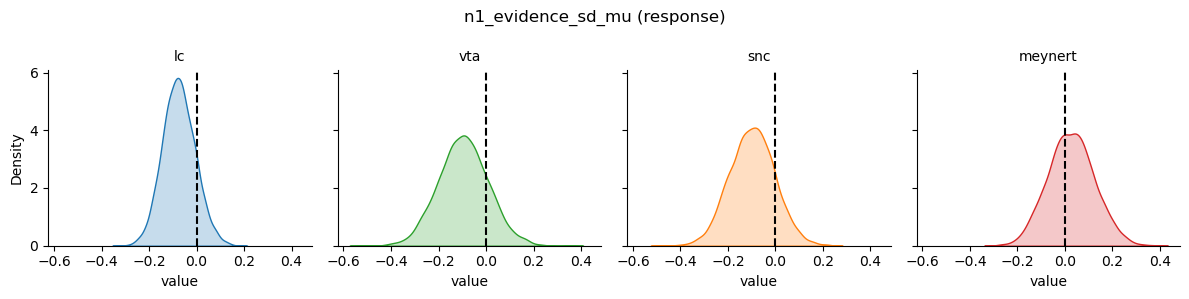

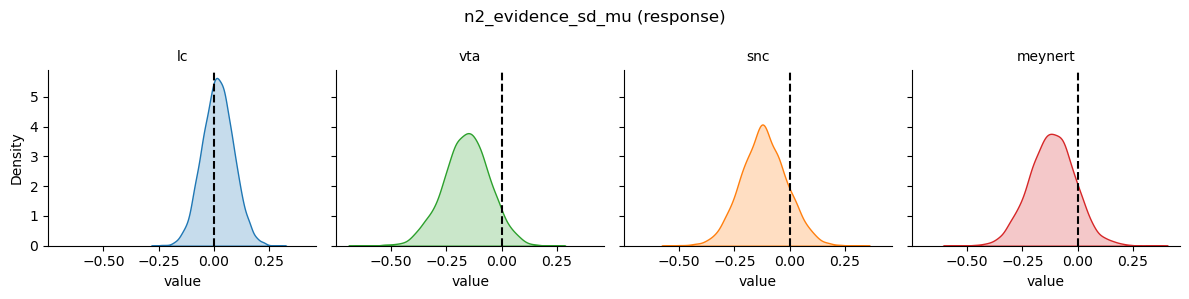

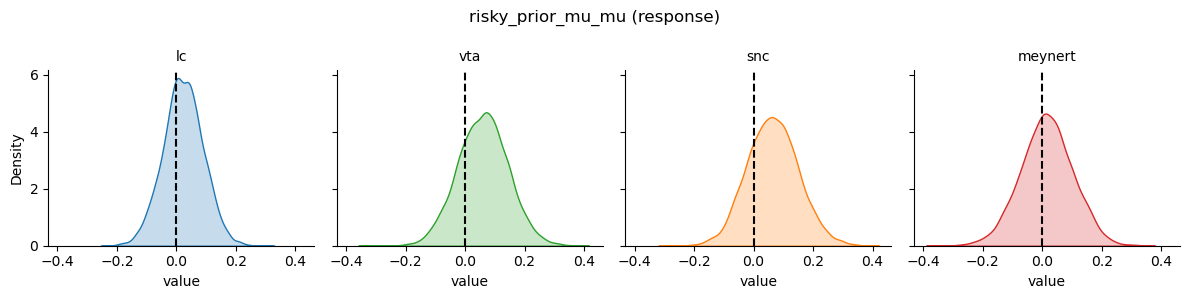

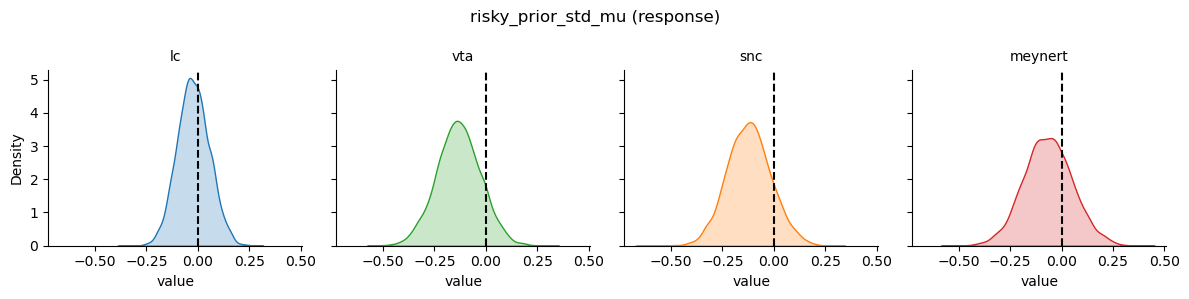

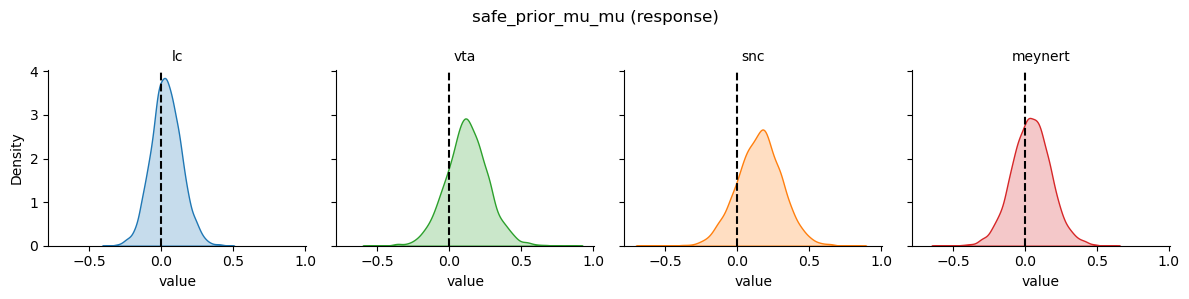

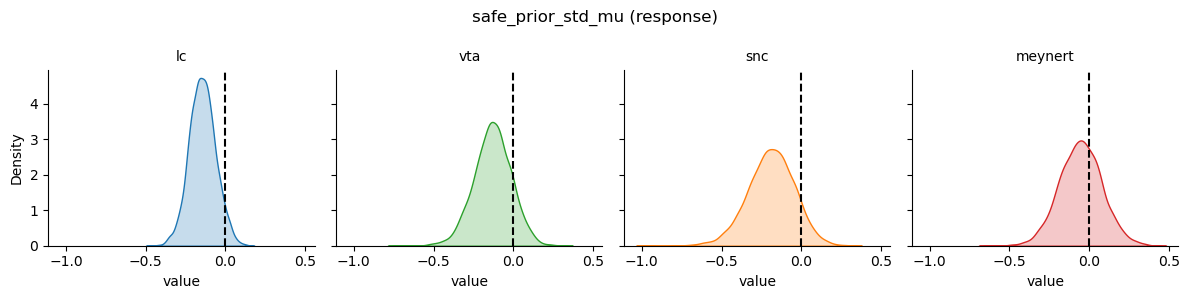

In [14]:
for key in pars:
    x = df.xs(key, 0, 'parameter')
    fac = sns.FacetGrid(x.reset_index(), col='mask', col_wrap=4, hue='mask',
    hue_order=['lc', 'snc', 'vta', 'meynert'])

    for roi, x_ in x.groupby('mask'):
        p = (x_ < 0.0).mean()
        print(key, roi, np.min((p, 1-p)))
    
    fac.map(sns.kdeplot, 'value', fill=True)
    fac.set_titles('{col_name}')

    fac.map(lambda *args, **kwargs: plt.axvline(0.0, c='k', ls='--'))

    fac.fig.suptitle(f'{key} (response)')

    plt.tight_layout()

In [15]:
df = []
keys = []
rois = ['lc', 'vtav2', 'sncv2', 'meynert']
# rois = ['vtav2', 'sncv2', 'lc']
pars =['n1_evidence_sd_mu', 'n2_evidence_sd_mu'] 

for mask, parameter in product(rois, pars):
    idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/ses-7t2_model-subcortical_response2_{mask}_trace.netcdf')
    df.append(idata.posterior[parameter].to_dataframe().xs(mask, 0, -1)[parameter])
    keys.append((mask.replace('v2', ''), parameter))

df = pd.concat(df, keys=keys, names=['mask', 'parameter']).to_frame('value')


n1_evidence_sd_mu lc 0.2696666666666667
n1_evidence_sd_mu meynert 0.15666666666666668
n1_evidence_sd_mu snc 0.4861666666666667
n1_evidence_sd_mu vta 0.36316666666666664
n2_evidence_sd_mu lc 0.21133333333333335
n2_evidence_sd_mu meynert 0.26483333333333337
n2_evidence_sd_mu snc 0.4078333333333334
n2_evidence_sd_mu vta 0.14349999999999996


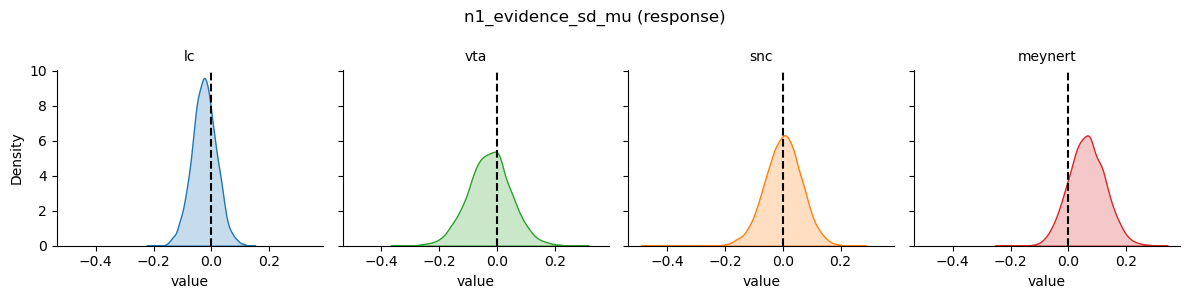

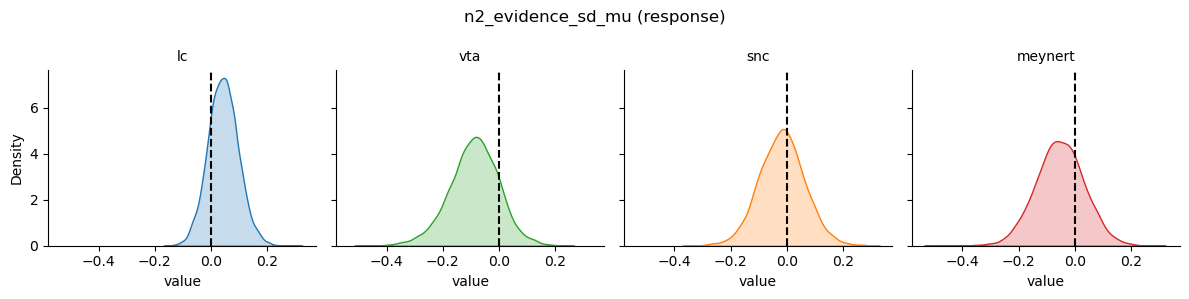

In [16]:
for key in pars:
    x = df.xs(key, 0, 'parameter')
    fac = sns.FacetGrid(x.reset_index(), col='mask', col_wrap=4, hue='mask',
    hue_order=['lc', 'snc', 'vta', 'meynert'])

    for roi, x_ in x.groupby('mask'):
        p = (x_ < 0.0).mean()
        print(key, roi, np.min((p, 1-p)))
    
    fac.map(sns.kdeplot, 'value', fill=True)
    fac.set_titles('{col_name}')

    fac.map(lambda *args, **kwargs: plt.axvline(0.0, c='k', ls='--'))

    fac.fig.suptitle(f'{key} (response)')

    plt.tight_layout()